##Análise de dados - Vacinação COVID-19 no Brasil
Candidata: Gleyce Alves



* A ideia é fazer uma análise inicial da importância de uma campanha de vacinação eficiente em massa para o controle e combate à proliferação do vírus do COVID-19. Inicialmente, foram utilizados os dados referentes à dinâmica da pandemia no Brasil, em conjunto com os dados da campanha de vacinação, ambos as bases de dados foram retirados de sites governamentais.

* Utilizei algumas métricas e gráficos para evidenciar a diminuição dos novos casos de óbitos à medida que a campanha de vacinação atingia novos locais e consequentemente novas pessoas.

* Também optei por fazer uma correlação entre a quantidade de doses aplicadas por estados do Brasil, municípios de Pernambuco e capitais do Brasil. Sempre fazendo uma divisão em grupos, a vacina monovalente e a bivalente.

### 1. Importação de bibliotecas e dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1.1 Dados Vacinação COVID-19 | [Vacinômetro COVID-19 (saude.gov.br)](https://infoms.saude.gov.br/extensions/SEIDIGI_DEMAS_Vacina_C19/SEIDIGI_DEMAS_Vacina_C19.html)

In [29]:
dir_dados = '/content/drive/MyDrive/vacinacao-covid19/'

dados_vacinacao = {}

for arquivo in [
    'bivalente-doses-aplicadas-por-municipio.xlsx',
    'bivalente-doses-aplicadas-por-sexo-faixa-etaria.xlsx',
    'bivalente-doses-aplicadas-por-tipo.xlsx',
    'bivalente-doses-aplicadas-por-uf.xlsx',
    'bivalente-doses-por-data.xlsx',
    'bivalente-por-municipio-faixa-etaria.xlsx',
    'bivalente-por-municipio-total.xlsx',
    'bivalente-por-uf-faixa-etaria.xlsx',
    'bivalente-por-uf-total.xlsx',
    'doses-aplicadas-indigenas-terras-homologadas.xlsx',
    'monovalente-doses-aplicadas-por-grupos.xlsx',
    'monovalente-doses-aplicadas-por-municipio.xlsx',
    'monovalente-doses-aplicadas-por-uf.xlsx',
    'monovalente-por-municipio-faixa-etaria.xlsx',
    'monovalente-por-uf-faixa-etaria.xlsx',
    'doses-aplicadas-quilombolas.xlsx',
    'monovalente-por-data.xlsx'
]:
    dados_vacinacao[arquivo[:-5]] = pd.read_excel(dir_dados + arquivo)



#### 1.2 Dados COVID-19 | [Dados COVID-19 (saude.gov.br)](https://covid.saude.gov.br/)

##### 1.2.1 Dividindo o conjunto de dados em antes e depois da vacinação

Data do inicio da campanha de vacinação do COVID-19 no Brasil: 17 de janeiro de 2021 (Ocorreram alterações do início da campanha para algumas UFs, mas adotei como padrão o dia 17 de janeiro, que foi quando ocorreu a primeira aplicação da dose da vacina)

**Mais informações:**
*   [Fiocruz](https://portal.fiocruz.br/noticia/vacinacao-contra-covid-19-no-brasil-completa-um-ano)
*   [OPAS - Organização Pan-Americana da Saúde](https://www.paho.org/pt/noticias/21-3-2021-brasil-recebera-primeiras-vacinas-contra-covid-19-por-meio-do-mecanismo-covax)



In [ ]:
arquivos_covid = [
  'HIST_PAINEL_COVIDBR_2023_Parte1_14jun2024.csv',
  'HIST_PAINEL_COVIDBR_2023_Parte2_14jun2024.csv',
  'HIST_PAINEL_COVIDBR_2024_Parte1_14jun2024.csv',
  'HIST_PAINEL_COVIDBR_2022_Parte1_14jun2024.csv',
  'HIST_PAINEL_COVIDBR_2022_Parte2_14jun2024.csv',
  'HIST_PAINEL_COVIDBR_2021_Parte1_14jun2024.csv',
  'HIST_PAINEL_COVIDBR_2021_Parte2_14jun2024.csv',
  'HIST_PAINEL_COVIDBR_2020_Parte1_14jun2024.csv',
  'HIST_PAINEL_COVIDBR_2020_Parte2_14jun2024.csv'
]

# Carregar os arquivos CSV em DataFrames e juntá-los em um único DataFrame
dados_covid = pd.concat([pd.read_csv(dir_dados + arquivo, sep=';') for arquivo in arquivos_covid])

# Converter a coluna 'data' para datetime
dados_covid['data'] = pd.to_datetime(dados_covid['data'], format='%Y-%m-%d')

dados_antes_vacinacao = dados_covid[dados_covid['data'] < '2021-01-17']
dados_depois_vacinacao = dados_covid[dados_covid['data'] >= '2021-01-17']

# Salvar os dois grupos em arquivos CSV
dados_antes_vacinacao.to_csv(dir_dados + 'covid-antes-da-vacinacao.csv', index=False)
dados_depois_vacinacao.to_csv(dir_dados + 'covid-depois-da-vacinacao.csv', index=False)



In [ ]:
ultima_data_antes = dados_antes_vacinacao['data'].max()
ultima_data_depois = dados_depois_vacinacao['data'].max()

primeira_data_antes = dados_antes_vacinacao['data'].min()
primeira_data_depois = dados_depois_vacinacao['data'].min()

print("Última data antes da vacinação:", ultima_data_antes)
print("Primeira data antes da vacinação:", primeira_data_antes)
print("Última data depois da vacinação:", ultima_data_depois)
print("Primeira data depois da vacinação:", primeira_data_depois)


Última data antes da vacinação: 2021-01-16 00:00:00
Primeira data antes da vacinação: 2020-02-25 00:00:00
Última data depois da vacinação: 2024-06-14 00:00:00
Primeira data depois da vacinação: 2021-01-17 00:00:00


### 2. Pré-processamento de dados

##### 2.1.1 Tratando valores ausentes

In [ ]:
# Antes da vacinação

dados_ausentes_antes = dados_antes_vacinacao.isnull().sum()
print("Dados Ausentes Antes de Preencher:")
print(dados_ausentes_antes)

dados_antes_vacinacao['estado'] = dados_antes_vacinacao['estado'].fillna('Desconhecido')
dados_antes_vacinacao['municipio'] = dados_antes_vacinacao['municipio'].fillna('Desconhecido')
dados_antes_vacinacao['codmun'] = dados_antes_vacinacao['codmun'].fillna(0)
dados_antes_vacinacao['codRegiaoSaude'] = dados_antes_vacinacao['codRegiaoSaude'].fillna(0)
dados_antes_vacinacao['nomeRegiaoSaude'] = dados_antes_vacinacao['nomeRegiaoSaude'].fillna('Desconhecido')
dados_antes_vacinacao['Recuperadosnovos'] = dados_antes_vacinacao['Recuperadosnovos'].fillna(0)
dados_antes_vacinacao['emAcompanhamentoNovos'] = dados_antes_vacinacao['emAcompanhamentoNovos'].fillna(0)

dados_antes_vacinacao['data'] = pd.to_datetime(dados_antes_vacinacao['data'], format='%Y-%m-%d')

dados_ausentes_apos_preenchimento = dados_antes_vacinacao.isnull().sum()
print("\nDados Ausentes Após Preenchimento:")
print(dados_ausentes_apos_preenchimento)

# Salvar os dados limpos em um novo arquivo CSV
dados_antes_vacinacao.to_csv(dir_dados + 'arquivo_antes_vacinacao_tratado.csv', index=False)

# Mostrar as primeiras linhas do DataFrame limpo
print("\nPrimeiras Linhas do DataFrame Após Limpeza:")
print(dados_antes_vacinacao.head())

Dados Ausentes Antes de Preencher:
regiao                          0
estado                        327
municipio                   15372
coduf                           0
codmun                       9156
codRegiaoSaude              15372
nomeRegiaoSaude             15372
data                            0
semanaEpi                       0
populacaoTCU2019             6216
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          1663765
emAcompanhamentoNovos     1663765
interior/metropolitana      15372
dtype: int64


<ipython-input-6-ae1480dc81f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_antes_vacinacao['estado'] = dados_antes_vacinacao['estado'].fillna('Desconhecido')
<ipython-input-6-ae1480dc81f6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_antes_vacinacao['municipio'] = dados_antes_vacinacao['municipio'].fillna('Desconhecido')
<ipython-input-6-ae1480dc81f6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 


Dados Ausentes Após Preenchimento:
regiao                        0
estado                        0
municipio                     0
coduf                         0
codmun                        0
codRegiaoSaude                0
nomeRegiaoSaude               0
data                          0
semanaEpi                     0
populacaoTCU2019           6216
casosAcumulado                0
casosNovos                    0
obitosAcumulado               0
obitosNovos                   0
Recuperadosnovos              0
emAcompanhamentoNovos         0
interior/metropolitana    15372
dtype: int64

Primeiras Linhas do DataFrame Após Limpeza:
   regiao        estado     municipio  coduf  codmun  codRegiaoSaude  \
0  Brasil  Desconhecido  Desconhecido     76     0.0             0.0   
1  Brasil  Desconhecido  Desconhecido     76     0.0             0.0   
2  Brasil  Desconhecido  Desconhecido     76     0.0             0.0   
3  Brasil  Desconhecido  Desconhecido     76     0.0             0.0   
4 

In [ ]:
# Depois da vacinação

dados_ausentes_depois = dados_depois_vacinacao.isnull().sum()
print("Dados Ausentes Depois de Preencher:")
print(dados_ausentes_depois)

dados_depois_vacinacao['estado'] = dados_depois_vacinacao['estado'].fillna('Desconhecido')
dados_depois_vacinacao['municipio'] = dados_depois_vacinacao['municipio'].fillna('Desconhecido')
dados_depois_vacinacao['codmun'] = dados_depois_vacinacao['codmun'].fillna(0)
dados_depois_vacinacao['codRegiaoSaude'] = dados_depois_vacinacao['codRegiaoSaude'].fillna(0)
dados_depois_vacinacao['nomeRegiaoSaude'] = dados_depois_vacinacao['nomeRegiaoSaude'].fillna('Desconhecido')
dados_depois_vacinacao['Recuperadosnovos'] = dados_depois_vacinacao['Recuperadosnovos'].fillna(0)
dados_depois_vacinacao['emAcompanhamentoNovos'] = dados_depois_vacinacao['emAcompanhamentoNovos'].fillna(0)

dados_depois_vacinacao['data'] = pd.to_datetime(dados_depois_vacinacao['data'], format='%Y-%m-%d')

dados_ausentes_apos_preenchimento = dados_depois_vacinacao.isnull().sum()
print("\nDados Ausentes Após Preenchimento:")
print(dados_ausentes_apos_preenchimento)

# Salvar os dados limpos em um novo arquivo CSV
dados_depois_vacinacao.to_csv(dir_dados + 'arquivo_depois_vacinacao_tratado.csv', index=False)

# Mostrar as primeiras linhas do DataFrame limpo
print("\nPrimeiras Linhas do DataFrame Após Limpeza:")
print(dados_depois_vacinacao.head())


Dados Ausentes Depois de Preencher:
regiao                          0
estado                       1245
municipio                   61005
coduf                           0
codmun                      34860
codRegiaoSaude              61005
nomeRegiaoSaude             61005
data                            0
semanaEpi                       0
populacaoTCU2019            26145
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          6994412
emAcompanhamentoNovos     6994412
interior/metropolitana      61005
dtype: int64


<ipython-input-7-38d45298eade>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_depois_vacinacao['estado'] = dados_depois_vacinacao['estado'].fillna('Desconhecido')
<ipython-input-7-38d45298eade>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_depois_vacinacao['municipio'] = dados_depois_vacinacao['municipio'].fillna('Desconhecido')
<ipython-input-7-38d45298eade>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer


Dados Ausentes Após Preenchimento:
regiao                        0
estado                        0
municipio                     0
coduf                         0
codmun                        0
codRegiaoSaude                0
nomeRegiaoSaude               0
data                          0
semanaEpi                     0
populacaoTCU2019          26145
casosAcumulado                0
casosNovos                    0
obitosAcumulado               0
obitosNovos                   0
Recuperadosnovos              0
emAcompanhamentoNovos         0
interior/metropolitana    61005
dtype: int64

Primeiras Linhas do DataFrame Após Limpeza:
   regiao        estado     municipio  coduf  codmun  codRegiaoSaude  \
0  Brasil  Desconhecido  Desconhecido     76     0.0             0.0   
1  Brasil  Desconhecido  Desconhecido     76     0.0             0.0   
2  Brasil  Desconhecido  Desconhecido     76     0.0             0.0   
3  Brasil  Desconhecido  Desconhecido     76     0.0             0.0   
4 

### 3. Análise Exploratória

##### 3.1 Gráfico antes da vacinação x depois da vacinação

In [ ]:
dados_antes_vacinacao['data'] = pd.to_datetime(dados_antes_vacinacao['data'], errors='coerce')
dados_depois_vacinacao['data'] = pd.to_datetime(dados_depois_vacinacao['data'], errors='coerce')

dados_antes_vacinacao['mes_ano'] = dados_antes_vacinacao['data'].dt.to_period('M')

dados_depois_vacinacao['mes_ano'] = dados_depois_vacinacao['data'].dt.to_period('M')

dados_antes_vacinacao_agrupados = dados_antes_vacinacao.groupby('mes_ano').agg({'obitosAcumulado': 'sum', 'obitosNovos': 'sum'})

dados_depois_vacinacao_agrupados = dados_depois_vacinacao.groupby('mes_ano').agg({'obitosAcumulado': 'sum', 'obitosNovos': 'sum'})

dados_antes_vacinacao_agrupados.reset_index(inplace=True)
dados_depois_vacinacao_agrupados.reset_index(inplace=True)


<ipython-input-19-25bedcb34800>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_antes_vacinacao['data'] = pd.to_datetime(dados_antes_vacinacao['data'], errors='coerce')
<ipython-input-19-25bedcb34800>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_depois_vacinacao['data'] = pd.to_datetime(dados_depois_vacinacao['data'], errors='coerce')
<ipython-input-19-25bedcb34800>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
print("Dados antes da vacinação por mês:")
print(dados_antes_vacinacao_agrupados)

print("\nDados depois da vacinação por mês:")
print(dados_depois_vacinacao_agrupados)

Dados antes da vacinação por mês:
    mes_ano  obitosAcumulado  obitosNovos
0   2020-02                0            0
1   2020-03             2572          603
2   2020-04           198311        17111
3   2020-05          1524155        70228
4   2020-06          4025228        90840
5   2020-07          7111428        98643
6   2020-08         10036783        86718
7   2020-09         12015738        67713
8   2020-10         14201181        47796
9   2020-11         14961012        39708
10  2020-12         17107716        65487
11  2021-01          9680943        43041

Dados depois da vacinação por mês:
    mes_ano  obitosAcumulado  obitosNovos
0   2021-01          9770115        45624
1   2021-02         20144952        91314
2   2021-03         26479545       199719
3   2021-04         32857242       246798
4   2021-05         40504473       177030
5   2021-06         44305530       165825
6   2021-07         50154717       114912
7   2021-08         52965675        72129
8   20

##### 3.1 Gráfico antes da vacinação x depois da vacinação

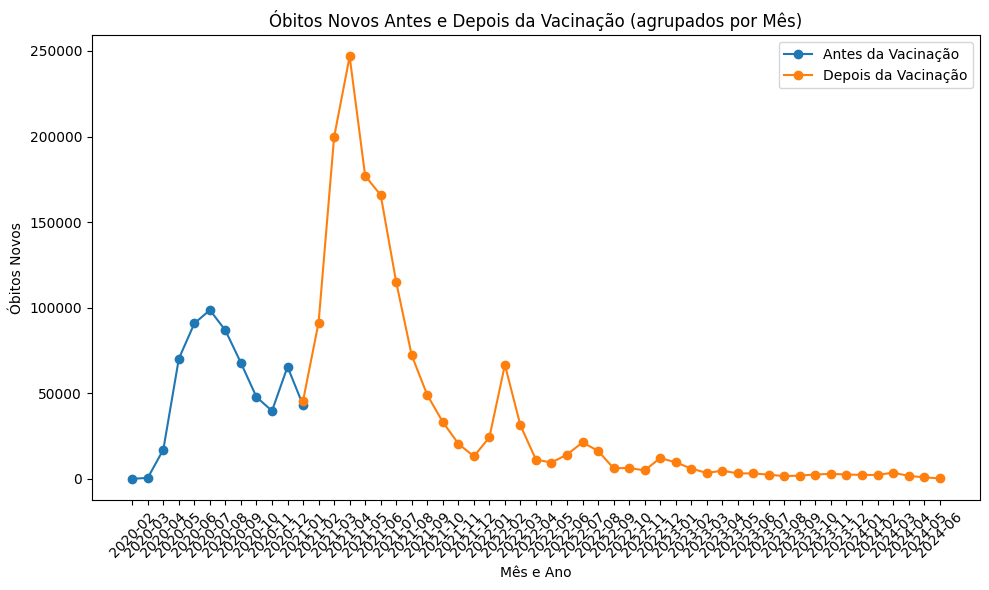

In [ ]:
meses_antes_vacinacao = dados_antes_vacinacao_agrupados['mes_ano'].dt.strftime('%Y-%m')
meses_depois_vacinacao = dados_depois_vacinacao_agrupados['mes_ano'].dt.strftime('%Y-%m')

plt.figure(figsize=(10, 6))
plt.title('Óbitos Novos Antes e Depois da Vacinação (agrupados por Mês)')
plt.xlabel('Mês e Ano')
plt.ylabel('Óbitos Novos')

plt.plot(meses_antes_vacinacao, dados_antes_vacinacao_agrupados['obitosNovos'], label='Antes da Vacinação', marker='o')

plt.plot(meses_depois_vacinacao, dados_depois_vacinacao_agrupados['obitosNovos'], label='Depois da Vacinação', marker='o')

plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


A ideia desse gráfico é mostrar a evolução de mortes por COVID-19 no período anterior e posterior ao início da campanha de vacinação.

*   O agrupamento por mês foi uma escolha feita dado o tamanho da base de dados, para que o gráfico fique mais visível, diminuindo o espaçamento temporal.

*   O gráfico utiliza a coluna obitosNovos, que descreve o número de óbitos novos confirmados por COVID-19 registrados pelos órgãos governamentais. Esses óbitos não refletem necessariamente o dia da morte, mas sim a data em que tiveram a confirmação laboratorial ou clínico-epidemiológica. Dado esse fato, podem estar atreladas inconsistências na análise, sendo necessário um tratamento mais aprofundado dos dados. Numa análise mais profunda, é necessário verificar essas inconsistências.


*   A escolha de agrupamento mensal pode suavizar variações diárias ou semanais nos dados; nessa primeira análise, estamos desconsiderando essas variações.


Dadas as considerações iniciais, é interessante verificar que o maior pico de novos óbitos se dá nos meses iniciais da campanha de vacinação. Existem algumas explicações para esses fatos:

*   **Tempo de ação da vacinação:** O início da campanha de vacinação se deu
primordialmente para os grupos prioritários, ou seja, uma pequena parcela da população. Para o grupo geral, as primeiras doses foram entregues posteriormente. Dado esse fato, a proteção coletiva da vacina ainda não estaria completamente estabelecida, o que poderia resultar em alta de contágio e possivelmente novos casos de mortes.

*   **Variantes do vírus:** A campanha inicial de vacinação utilizou a vacina monovalente, que oferecia proteção contra a cepa inicial, a de Wuhan. Mas novas mutações desse vírus foram encontradas, o que poderia ocasionar o alto nível de mortes.

*   **Tempo de incubação e diagnóstico:** O processo de incubação do vírus e o possível diagnóstico do COVID-19 não são imediatos. Comumente, as pessoas que faziam os testes para detecção do vírus só o faziam mediante a apresentação de alguns sintomas ou exposição confirmada a alguém infectado. A confirmação de morte devido a esse vírus também requer um tempo adicional.

*   **Eficácia da vacinação em massa:** Existe a eficácia da vacinação individual, mas é importante também verificar a eficácia em massa da campanha de vacinação. Esta última requer um tempo maior para que seja observada a redução de óbitos e do número de infectados. É importante salientar que, tratando-se de uma pandemia como foi a do COVID-19, a vacinação em massa é um dos principais pontos de combate contra a proliferação do vírus.

Desconsiderando esse pico inicial no início da campanha de vacinação, é nítido ver a diminuição de casos de novos óbitos, comprovando a eficácia da vacina.


**Fontes:**

[UOL - Dia mais letal da pandemia do COVID-19](https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2022/01/17/dia-mais-letal-da-pandemia-no-pais-teve-mais-mortes-que-dezembro-de-2021.htm)

[PODER360 - Março teve 80 mil mortes no Brasil](https://www.poder360.com.br/coronavirus/pico-da-pandemia-marco-teve-80-mil-mortes-por-data-real-no-brasil/)

[G1 - 2021 foi ano mais letal da pandemia no pais](https://g1.globo.com/jornal-nacional/noticia/2021/12/31/balanco-indica-que-2021-foi-o-ano-mais-letal-da-pandemia-no-pais.ghtml)

[Gov.br - Eficácia das vacinas](https://www.gov.br/secom/pt-br/fatos/brasil-contra-fake/noticias/2023/12/vacinas-contra-a-covid-19-sao-seguras-eficazes-e-protegem-criancas)

##### 3.2 Gráfico antes da vacinação x depois da vacinação (agrupados por mês e UF)

In [ ]:
dados_antes_vacinacao['data'] = pd.to_datetime(dados_antes_vacinacao['data'], errors='coerce')
dados_depois_vacinacao['data'] = pd.to_datetime(dados_depois_vacinacao['data'], errors='coerce')

dados_antes_vacinacao['mes_ano'] = dados_antes_vacinacao['data'].dt.to_period('M')

dados_depois_vacinacao['mes_ano'] = dados_depois_vacinacao['data'].dt.to_period('M')

dados_antes_vacinacao = dados_antes_vacinacao[dados_antes_vacinacao['estado'] != 'Desconhecido']
dados_depois_vacinacao = dados_depois_vacinacao[dados_depois_vacinacao['estado'] != 'Desconhecido']

agrupados_antes_vacinacao = dados_antes_vacinacao.groupby(['mes_ano', 'estado']).agg({'obitosNovos': 'sum'}).reset_index()

agrupados_depois_vacinacao = dados_depois_vacinacao.groupby(['mes_ano', 'estado']).agg({'obitosNovos': 'sum'}).reset_index()

pivot_antes_vacinacao = agrupados_antes_vacinacao.pivot(index='mes_ano', columns='estado', values='obitosNovos')
pivot_depois_vacinacao = agrupados_depois_vacinacao.pivot(index='mes_ano', columns='estado', values='obitosNovos')

<ipython-input-21-c612e431dc00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_antes_vacinacao['data'] = pd.to_datetime(dados_antes_vacinacao['data'], errors='coerce')
<ipython-input-21-c612e431dc00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_depois_vacinacao['data'] = pd.to_datetime(dados_depois_vacinacao['data'], errors='coerce')
<ipython-input-21-c612e431dc00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
metricas_antes_vacinacao = pivot_antes_vacinacao.describe().transpose()

metricas_depois_vacinacao = pivot_depois_vacinacao.describe().transpose()

print("Métricas antes da vacinação:")
print(metricas_antes_vacinacao[['mean', '50%', 'std', 'min', 'max']])

print("\nMétricas depois da vacinação:")
print(metricas_depois_vacinacao[['mean', '50%', 'std', 'min', 'max']])


Métricas antes da vacinação:
               mean     50%          std  min      max
estado                                                
AC       139.166667    87.0   136.388371  0.0    434.0
AL       435.166667   316.0   399.406340  0.0   1218.0
AM      1020.500000   813.0   857.847677  0.0   3254.0
AP       166.000000   130.0   133.822134  0.0    390.0
BA      1601.000000  1507.0  1257.322552  0.0   3868.0
CE      1703.833333   853.0  2030.918728  0.0   6272.0
DF       735.333333   576.0   706.156992  0.0   2104.0
ES       915.500000   830.0   680.511238  0.0   2088.0
GO      1179.500000   804.0  1163.062767  0.0   3156.0
MA       766.833333   540.0   731.715026  0.0   2186.0
MG      2225.833333  2479.0  1805.686665  0.0   5132.0
MS       443.500000   466.0   414.551784  0.0   1120.0
MT       785.000000   657.0   780.594878  0.0   2452.0
PA      1231.333333   481.0  1709.532915  0.0   5430.0
PB       646.666667   575.0   526.502928  0.0   1668.0
PE      1665.500000  1176.0  1525.92

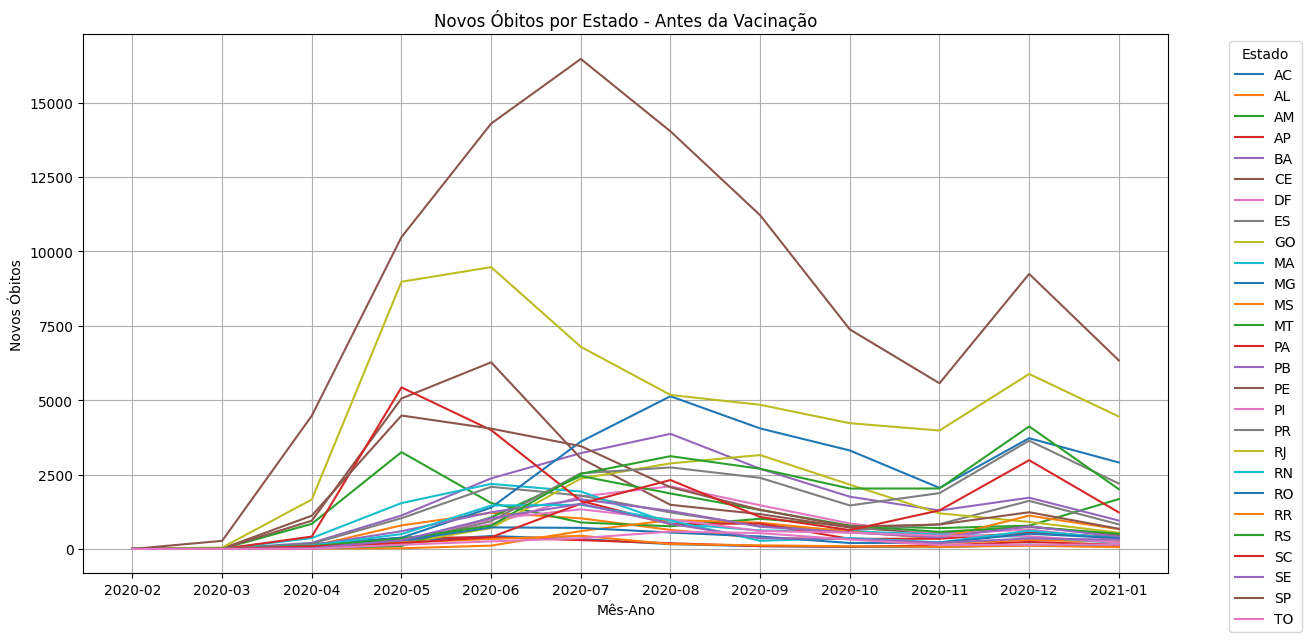

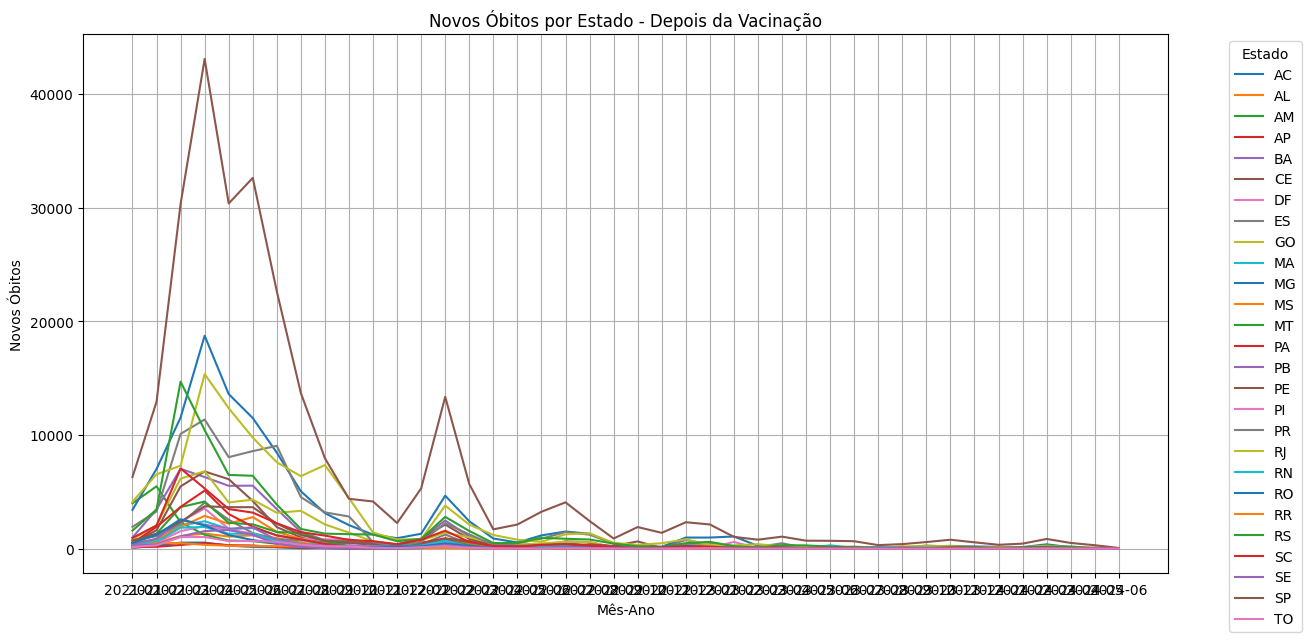

In [ ]:
plt.figure(figsize=(14, 7))
plt.title('Novos Óbitos por Estado - Antes da Vacinação')
for estado in pivot_antes_vacinacao.columns:
    plt.plot(pivot_antes_vacinacao.index.astype(str), pivot_antes_vacinacao[estado], label=estado)
plt.xlabel('Mês-Ano')
plt.ylabel('Novos Óbitos')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.title('Novos Óbitos por Estado - Depois da Vacinação')
for estado in pivot_depois_vacinacao.columns:
    plt.plot(pivot_depois_vacinacao.index.astype(str), pivot_depois_vacinacao[estado], label=estado)
plt.xlabel('Mês-Ano')
plt.ylabel('Novos Óbitos')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


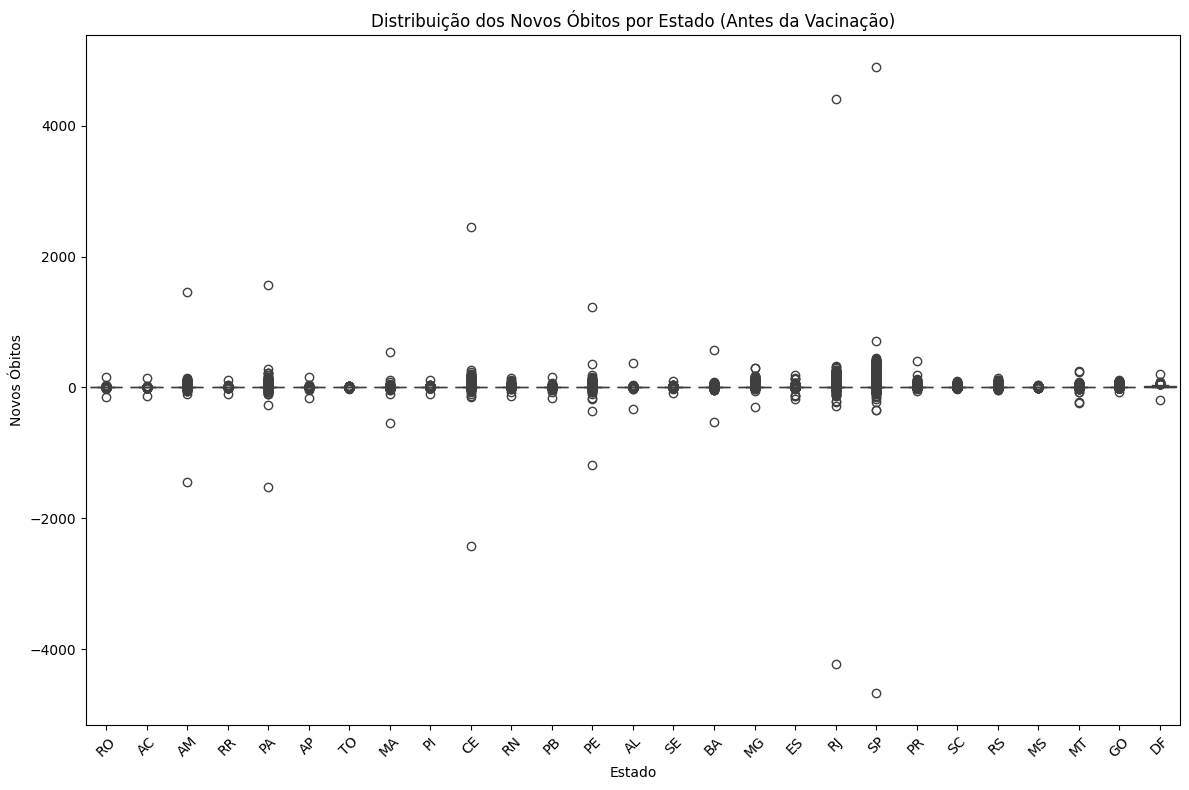

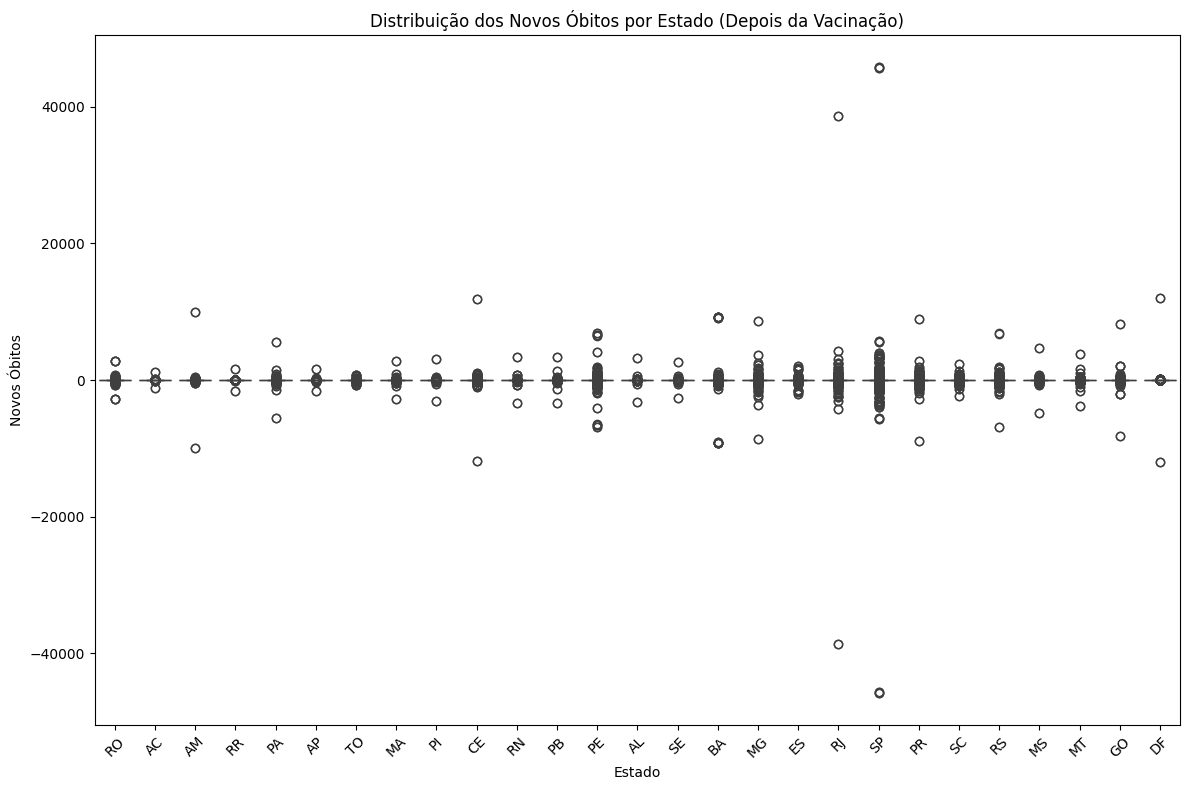

In [ ]:
# Gráfico de Boxplot dos novos óbitos por Estado antes da vacinação
plt.figure(figsize=(12, 8))
sns.boxplot(data=dados_antes_vacinacao, x='estado', y='obitosNovos')
plt.title('Distribuição dos Novos Óbitos por Estado (Antes da Vacinação)')
plt.xlabel('Estado')
plt.ylabel('Novos Óbitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de Boxplot dos novos óbitos por Estado depois da vacinação
plt.figure(figsize=(12, 8))
sns.boxplot(data=dados_depois_vacinacao, x='estado', y='obitosNovos')
plt.title('Distribuição dos Novos Óbitos por Estado (Depois da Vacinação)')
plt.xlabel('Estado')
plt.ylabel('Novos Óbitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*   Antes da vacinação SP, RJ e MG possuem as maores médias de novos óbitos.
*   Depois da vacinação,SP ainda permanece com a maior média de novos óbitos, mas isso pode estar atrelado a densidade populacional do estado e alta roatitvidade de pessoas.
*   A diminuição na média e no desvio padrão de novos óbitos para os Estados após o inicio da campanha de vacinação sugere que a campanha ocsaionou a diminuição de novos óbitos.
*   Sobre a distribuição dos dados, existe um diferença significativa entre a média e mediana em vários Estados, esse é um bom indicativo de picos ou surtos localizados. Se analisarmos bem o gráfico dos casos de óbitos por tempo vemos que de fato, foram os intervalos temporais onde esses picos existiram.

Vamos continuar na análise pra verificar essas situações

#### 3.3 Vacinas monovalente vs novos óbitos (agrupado por Estado)

In [63]:
vacinas_monovalente_por_uf_df = pd.read_excel(dir_dados + 'monovalente-doses-aplicadas-por-uf.xlsx')
vacinas_monovalente_por_uf_df.head()

,UF,Total de Doses Aplicadas,1ª Dose,2ª Dose,3ª Dose,Dose Reforço,1° Dose Reforço,2° Dose Reforço,3° Dose Reforço,Dose Adicional,Dose Única
0,AC,1746443,709111,596831,5166,297883,5761,94012,1271,22653,13755
1,AL,6853172,2679502,2340862,12675,1276724,26048,446743,2883,11642,56093
2,AM,8893416,3513249,3038336,982425,833396,139679,302585,2572,22140,59034
3,AP,1622795,660918,546826,13906,263628,19549,79290,869,26309,11500
4,BA,36098903,12825092,11393164,214321,7357712,71648,3430208,58206,460773,287779


In [79]:
vacinas_agrupadas = vacinas_monovalente_por_uf_df[['UF', 'Total de Doses Aplicadas']]

obitos_agrupados = dados_covid.groupby('estado')['obitosNovos'].sum().reset_index()
obitos_agrupados = obitos_agrupados.dropna(subset=['estado'])
obitos_agrupados.head()


,estado,obitosNovos
0,AC,4160
1,AL,14688
2,AM,28996
3,AP,4348
4,BA,64004


In [83]:
print("Primeiros registros de óbitos agrupados:")
print(obitos_agrupados.head())

print("\nPrimeiros registros de vacinas agrupadas:")
print(vacinas_agrupadas.head())


Primeiros registros de óbitos agrupados:
  estado  obitosNovos
0     AC         4160
1     AL        14688
2     AM        28996
3     AP         4348
4     BA        64004

Primeiros registros de vacinas agrupadas:
   UF  Total de Doses Aplicadas
0  AC                   1746443
1  AL                   6853172
2  AM                   8893416
3  AP                   1622795
4  BA                  36098903


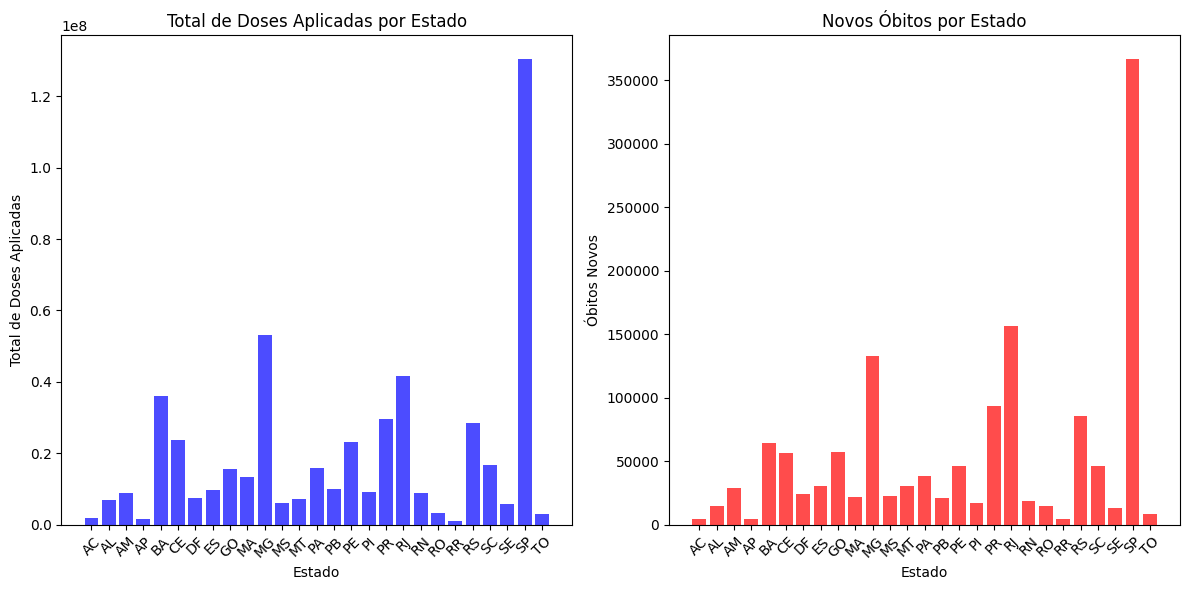

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para doses aplicadas de vacinas por estado
axes[0].bar(vacinas_agrupadas['UF'], vacinas_agrupadas['Total de Doses Aplicadas'],
             color='blue', alpha=0.7)
axes[0].set_title('Total de Doses Aplicadas por Estado')
axes[0].set_xlabel('Estado')
axes[0].set_ylabel('Total de Doses Aplicadas')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para óbitos novos por estado
axes[1].bar(obitos_agrupados['estado'], obitos_agrupados['obitosNovos'],
             color='red', alpha=0.7)
axes[1].set_title('Novos Óbitos por Estado')
axes[1].set_xlabel('Estado')
axes[1].set_ylabel('Óbitos Novos')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [86]:
# Calculando as métricas descritivas para óbitos novos agrupados por estado
media_obitos_novos = obitos_agrupados['obitosNovos'].mean()
max_obitos_novos = obitos_agrupados['obitosNovos'].max()
min_obitos_novos = obitos_agrupados['obitosNovos'].min()
desvio_padrao_obitos_novos = obitos_agrupados['obitosNovos'].std()

# Exibindo as métricas descritivas
print(f"Média de Óbitos Novos por Estado: {media_obitos_novos:.2f}")
print(f"Máximo de Óbitos Novos: {max_obitos_novos}")
print(f"Mínimo de Óbitos Novos: {min_obitos_novos}")
print(f"Desvio Padrão dos Óbitos Novos: {desvio_padrao_obitos_novos:.2f}")


Média de Óbitos Novos por Estado: 52766.59
Máximo de Óbitos Novos: 367006
Mínimo de Óbitos Novos: 4160
Desvio Padrão dos Óbitos Novos: 73451.46


In [87]:
# Calculando as métricas descritivas para total de doses aplicadas por estado
media_doses_aplicadas = vacinas_agrupadas['Total de Doses Aplicadas'].mean()
max_doses_aplicadas = vacinas_agrupadas['Total de Doses Aplicadas'].max()
min_doses_aplicadas = vacinas_agrupadas['Total de Doses Aplicadas'].min()
desvio_padrao_doses_aplicadas = vacinas_agrupadas['Total de Doses Aplicadas'].std()

# Exibindo as métricas descritivas
print(f"Média de Total de Doses Aplicadas por Estado: {media_doses_aplicadas:.2f}")
print(f"Máximo de Total de Doses Aplicadas: {max_doses_aplicadas}")
print(f"Mínimo de Total de Doses Aplicadas: {min_doses_aplicadas}")
print(f"Desvio Padrão do Total de Doses Aplicadas: {desvio_padrao_doses_aplicadas:.2f}")


Média de Total de Doses Aplicadas por Estado: 19223322.70
Máximo de Total de Doses Aplicadas: 130513220
Mínimo de Total de Doses Aplicadas: 1123674
Desvio Padrão do Total de Doses Aplicadas: 25837765.70




*   O desvio padrão dos novos óbitos e doses de vacinas aplicadas demonstram uma dispersão significativa em relação à média sugerindo uma variabilidade considerável entre os Estados.
*   Por mais que visualmente os gráficos são bem semelhantes, devido ao fato de possuirem distribuições similares, as escalas são bem diferentes, sendo maior a escala de Total de doses aplicadas por UF.



#### 3.4 Vacinação por municipio de Pernambuco

In [119]:
monovalente_por_municipio_df = pd.read_excel(dir_dados + 'monovalente-doses-aplicadas-por-municipio.xlsx')
bivalente_por_municipio_df = pd.read_excel(dir_dados + 'bivalente-doses-aplicadas-por-municipio.xlsx')

pe_municipio_monovalente = monovalente_por_municipio_df[monovalente_por_municipio_df['COD IBGE'].astype(str).str.startswith('26')]
pe_municipio_bivalente = bivalente_por_municipio_df[bivalente_por_municipio_df['COD IBGE'].astype(str).str.startswith('26')]

print("Primeiras linhas do DataFrame monovalente para municípios de PE:")
print(pe_municipio_monovalente.head())

print("\nPrimeiras linhas do DataFrame bivalente para municípios de PE:")
print(pe_municipio_bivalente.head())

Primeiras linhas do DataFrame monovalente para municípios de PE:
      COD IBGE              Município  Total de Doses Aplicadas  1ª Dose  \
1465    260005           Abreu E Lima                    213812    87088   
1466    260010  Afogados Da Ingazeira                    105813    33048   
1467    260020                Afrânio                     46820    17292   
1468    260030              Agrestina                     58021    22486   
1469    260040             Água Preta                     52978    21485   

      2ª Dose  3ª Dose  Dose Reforço  1° Dose Reforço  2° Dose Reforço  \
1465    73610     1635         35605              961            11942   
1466    30232      406         27561              588             9365   
1467    15722      134          9991              153             3253   
1468    18907       97         11921               19             4184   
1469    17621      432          8617               38             3206   

      3° Dose Reforço  Dose Adici

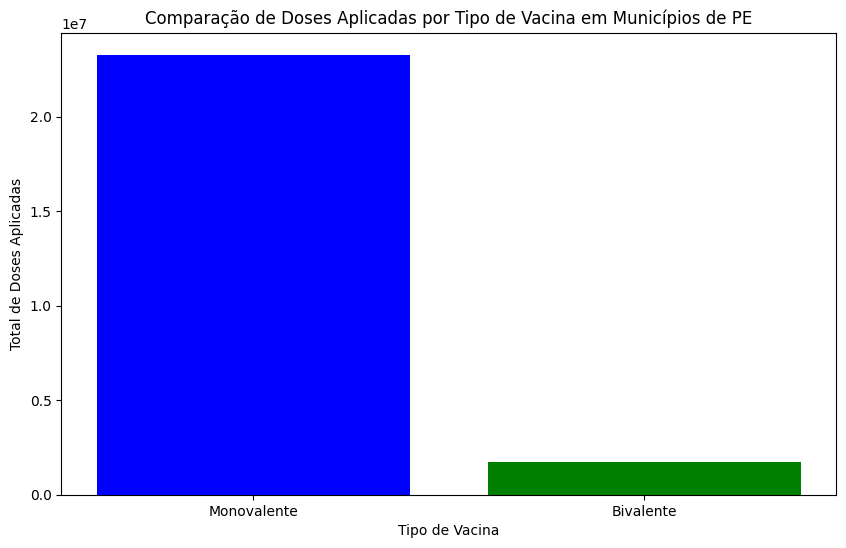

In [107]:
total_doses_monovalente = pe_municipio_monovalente['Total de Doses Aplicadas'].sum()
total_doses_bivalente = pe_municipio_bivalente['Total de doses Aplicadas Bivalentes'].sum()

# Criar o gráfico de barras comparativo
plt.figure(figsize=(10, 6))
plt.bar(['Monovalente', 'Bivalente'], [total_doses_monovalente, total_doses_bivalente], color=['blue', 'green'])
plt.xlabel('Tipo de Vacina')
plt.ylabel('Total de Doses Aplicadas')
plt.title('Comparação de Doses Aplicadas por Tipo de Vacina em Municípios de PE')
plt.show()

In [113]:
metricas_monovalente = pe_municipio_monovalente['Total de Doses Aplicadas'].describe()
metricas_bivalente = pe_municipio_bivalente['Total de doses Aplicadas Bivalentes'].describe()

print("Métricas das Doses Aplicadas da Vacina Monovalente:")
print(metricas_monovalente)

print("\nMétricas das Doses Aplicadas da Vacina Bivalente:")
print(metricas_bivalente)


Métricas das Doses Aplicadas da Vacina Monovalente:
count    1.850000e+02
mean     1.257796e+05
std      3.780611e+05
min      1.418000e+04
25%      3.288300e+04
50%      5.232600e+04
75%      8.985800e+04
max      4.688027e+06
Name: Total de Doses Aplicadas, dtype: float64

Métricas das Doses Aplicadas da Vacina Bivalente:
count       185.000000
mean       9262.967568
std       37359.702047
min         317.000000
25%        1763.000000
50%        3115.000000
75%        6197.000000
max      489934.000000
Name: Total de doses Aplicadas Bivalentes, dtype: float64


In [114]:
# Encontrar o município com o maior número de doses aplicadas da vacina monovalente
maior_dose_monovalente_pe = pe_municipio_monovalente.loc[pe_municipio_monovalente['Total de Doses Aplicadas'].idxmax()]
print("Município com maior número de doses aplicadas da vacina monovalente:")
print(maior_dose_monovalente_pe)


Município com maior número de doses aplicadas da vacina monovalente:
COD IBGE                     261160
Município                    Recife
Total de Doses Aplicadas    4688027
1ª Dose                     1673756
2ª Dose                     1490904
3ª Dose                      219822
Dose Reforço                 689698
1° Dose Reforço               11727
2° Dose Reforço              350103
3° Dose Reforço              239149
Dose Adicional                 9172
Dose Única                     3696
Name: 1596, dtype: object


In [115]:
# Encontrar o município com o maior número de doses aplicadas da vacina bivalente
maior_dose_bivalente_pe = pe_municipio_bivalente.loc[pe_municipio_bivalente['Total de doses Aplicadas Bivalentes'].idxmax()]
print("Município com maior número de doses aplicadas da vacina bivalente:")
print(maior_dose_bivalente_pe)


Município com maior número de doses aplicadas da vacina bivalente:
COD IBGE                               261160
Município                              Recife
Total de doses Aplicadas Bivalentes    489934
Reforço                                423125
Outras doses                            66809
Name: 1596, dtype: object



*  O inicio da aplicação da vacina bivalente se deu em fevereiro de 2023.

*   A vacina monovalente foi a mais aplicada, com uma média de 125.779,6 doses por município.

*   O município de Pernambuco o qual teve o maior número de doses aplicadas, tanto da monovalente e da bivalente, foi o Recife, a capital Pernambucana.

**Fonte:**

[Senado - Inicio da vacinação bivalente](https://www12.senado.leg.br/radio/1/noticia/2023/05/09/voce-sabe-o-que-e-a-vacina-bivalente#:~:text=A%20imuniza%C3%A7%C3%A3o%20com%20a%20vacina,SUS%2C%20Sistema%20%C3%9Anico%20de%20Sa%C3%BAde.)

### 3.6 Total de doses aplicadas por capitais

In [120]:
# Exibir as primeiras linhas de cada DataFrame para verificar se foram carregados corretamente
print("Primeiras linhas do DataFrame monovalente:")
print(monovalente_por_municipio_df.head())

print("\nPrimeiras linhas do DataFrame bivalente:")
print(bivalente_por_municipio_df.head())

Primeiras linhas do DataFrame monovalente:
   COD IBGE              Município  Total de Doses Aplicadas  1ª Dose  \
0    110001  Alta Floresta D'Oeste                     46096    18847   
1    110002              Ariquemes                    177950    78158   
2    110003                 Cabixi                     12263     4859   
3    110004                 Cacoal                    181238    76121   
4    110005             Cerejeiras                     33688    13247   

   2ª Dose  3ª Dose  Dose Reforço  1° Dose Reforço  2° Dose Reforço  \
0    17121       45          7545               28             2008   
1    65379    10987          9059              103             7451   
2     4395        6          2239               15              622   
3    63690      363         30172              371             8039   
4    11924       39          6061               26             1980   

   3° Dose Reforço  Dose Adicional  Dose Única  
0                1              52        

In [125]:
# Lista dos códigos IBGE das capitais
capitais_cod_ibge = [
    280030,150140,310620, 140010, 530010, 500270, 510340,410690,420540,230440,520870,250750,
    160030, 1302060, 270430, 130260, 240810, 172100, 431490, 110020, 261160, 120040, 330455, 292740,
    211130, 355030, 221100, 320530
]

# Filtrar as doses aplicadas para as capitais
capitais_municipio_monovalente = monovalente_por_municipio_df[monovalente_por_municipio_df['COD IBGE'].isin(capitais_cod_ibge)]
capitais_municipio_bivalente = bivalente_por_municipio_df[bivalente_por_municipio_df['COD IBGE'].isin(capitais_cod_ibge)]

# Exibir os DataFrames das doses aplicadas para as capitais
print("DataFrame com doses aplicadas da vacina monovalente para as capitais:")
print(capitais_municipio_monovalente.head())

print("\nDataFrame com doses aplicadas da vacina bivalente para as capitais:")
print(capitais_municipio_bivalente.head())



DataFrame com doses aplicadas da vacina monovalente para as capitais:
     COD IBGE    Município  Total de Doses Aplicadas  1ª Dose  2ª Dose  \
16     110020  Porto Velho                   1047255   415454   358663   
66     120040   Rio Branco                    850546   329366   287225   
111    130260       Manaus                   4931605  2007184  1769403   
138    140010    Boa Vista                    733168   328868   260439   
169    150140        Belém                   3554898  1323156  1255192   

     3ª Dose  Dose Reforço  1° Dose Reforço  2° Dose Reforço  3° Dose Reforço  \
16      3845        179650             1447            67197             1203   
66      1367        154198              122            56051              531   
111   917658        149746            55550             3894               18   
138     2446         93738             3407            26677              544   
169     8724        641759             7671           238810            30678   

Qual capital mais vacinou?

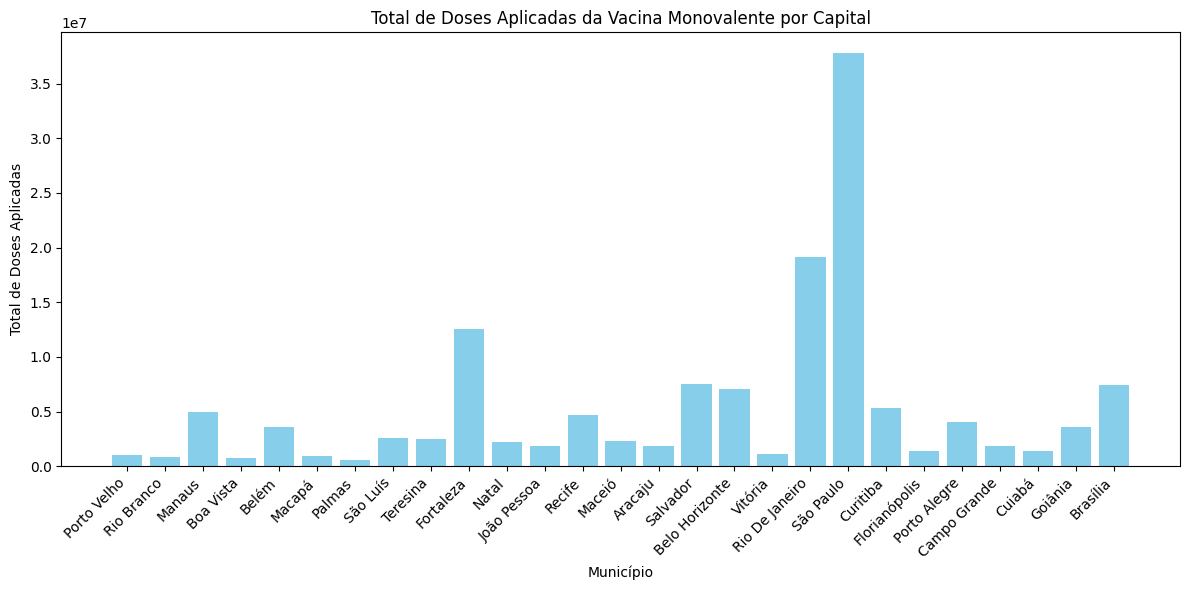

In [134]:
def plotar_grafico_doses_aplicadas_monovalente(df):
    plt.figure(figsize=(12, 6))
    plt.bar(df['Município'], df['Total de Doses Aplicadas'], color='skyblue')
    plt.xlabel('Município')
    plt.ylabel('Total de Doses Aplicadas')
    plt.title('Total de Doses Aplicadas da Vacina Monovalente por Capital')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plotar_grafico_doses_aplicadas_monovalente(capitais_municipio_monovalente)

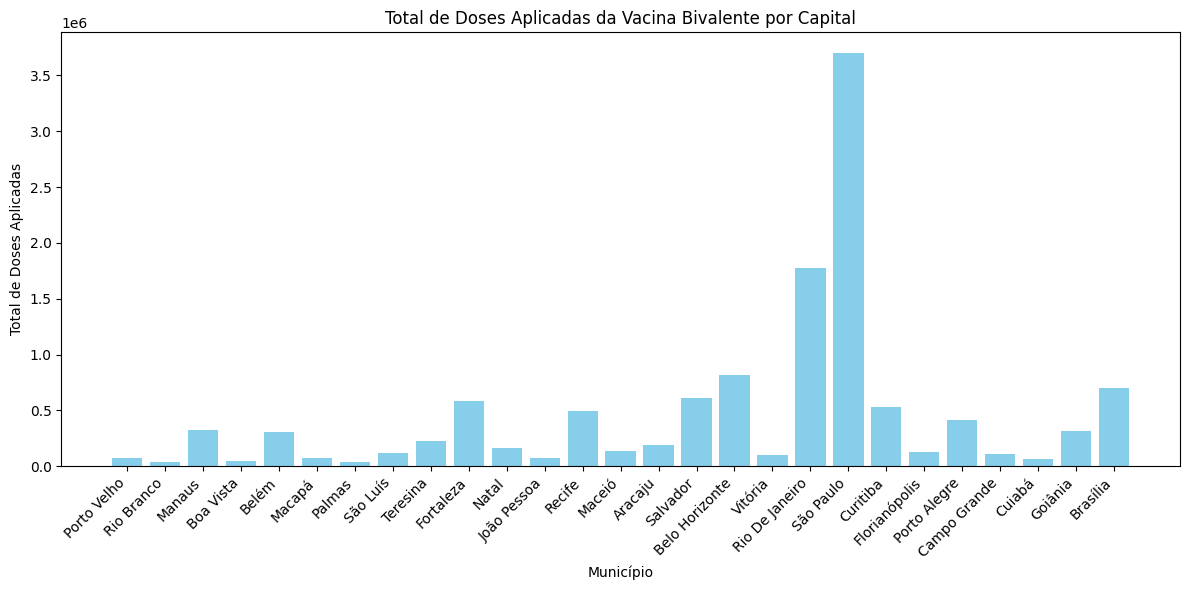

In [133]:
def plotar_grafico_doses_aplicadas_bivalente(df):
    plt.figure(figsize=(12, 6))
    plt.bar(df['Município'], df['Total de doses Aplicadas Bivalentes'], color='skyblue')
    plt.xlabel('Município')
    plt.ylabel('Total de Doses Aplicadas')
    plt.title('Total de Doses Aplicadas da Vacina Bivalente por Capital')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plotar_grafico_doses_aplicadas_bivalente(capitais_municipio_bivalente)

* A capital que mais teve doses aplicadas da vacina monovalente foi São Paulo, com um total de 4.688.027 doses aplicadas. Com relação à vacina bivalente, a capital que mais vacinou foi também São Paulo, com um total de 489.934 doses aplicadas.

*  Esse resultado, em partes, não nos dá uma resposta satisfatória. Para trazer um resultado mais robusto precisamos analisar outras variáveis que não estão dispostas nesse banco de dados, como densidade populacional, por exemplo. São Paulo possui um fluxo populacional grande, proporcionalmente as doses aplicadas nesse munícipio serão maiores do que em outras capitais com menor densidade populacional. Além da facilidade de vacinação pela estrutura da própria cidade.  

### Considerações finais

* As análises são iniciais e precisam de melhorias, adições de novas variáveis, limpeza de dados. Com uma análise mais aprofundada, pretendo adicionar outras variáveis socioeconômicas, de região etc., para dar mais robustez às análises.

* O estudo da vacinação a partir de grupos também pode ser feito, verificando os resultados em relação a diferentes grupos como indígenas, quilombolas, pessoas de baixa renda e demais.

* Existem outras bases de dados interessantes a serem exploradas, o OpenDataSUS, por exemplo, libera uma API pública para consulta dos bancos de dados. Pelo site do IBGE também é possível coletar informações socioeconômicas de regiões específicas. Também é possível coletar dados em relação ao clima, que numa análise mais profunda pode ser utilizado para explicar os picos de mortes durante a pandemia. Além de variáveis políticas que contribuem bastante para uma forte campanha de vacinação, garantindo a proteção em massa.